In [1]:
#Import the necessary libraries, Modules and classifiers
import numpy as np #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #package providing fast, flexible, and expressive data structures, designed  
#to make working with “relational” or “labeled” data both easy and intuitive.

import matplotlib.pyplot as plt #standard package for plotting graphs
import seaborn as sns #visualization library based on matplotlib
%matplotlib inline 
#IPython-specific directive which causes IPython to display matplotlib plots in a notebook cell 
#rather than in another window (comment in the same line as  inlne command causes an error) 

In [2]:
#read the data from a csv-file, ensure that the  values are separated by commas otherwise you need to   
#specify the delimiter explicitly within the following load-statement:
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0)

hr_data.head() #show the first five entries; attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.shape

(14999, 10)

In [4]:
hr_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


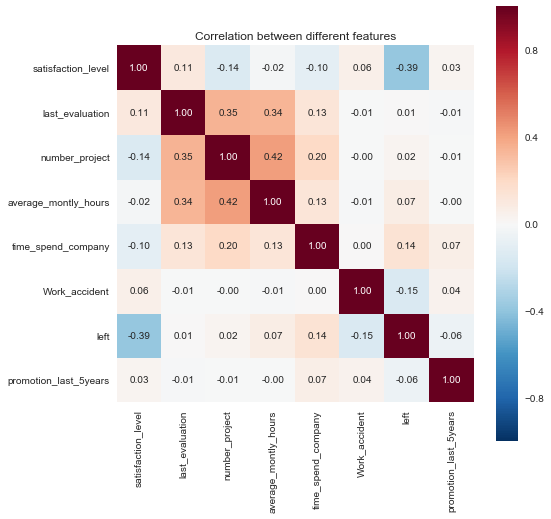

In [5]:
#Correlation matrix is used to do some basic visualizations and show any relationships in the data.
plt.figure(figsize=(8,8)) #sets the overall size of the plot
sns.heatmap(hr_data.corr(), vmax=1, square=True,annot=True,fmt='.2f') ##compute pairwise correlation of columns

plt.title('Correlation between different features');

In [6]:
df_drop=hr_data.drop(labels=['sales','salary'],axis=1) #drop the columns in the dataframe
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [7]:
#Now we bring the "left" column to the front as it is the label and not the feature.
cols = df_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [8]:
#We are converting columns of the dataframe to list so it would be easier for us to 
#reshuffle the columns. We are going to use cols.insert method
cols.insert(0, cols.pop(cols.index('left')))

In [9]:
#By using df_drop.reindex(columns= cols) we are converting list to columns again#
df_drop = df_drop.reindex(columns= cols)

In [10]:
#We are separating features of our dataframe from the labels.
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  4.  ,  0.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  3.  ,  0.  ,  0.  ]])

In [11]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
np.shape(X)

(14999, 7)

In [13]:
np.shape(y)

(14999,)

In [14]:
###Principal Component Analysis###
#Data Standardisation#
from sklearn.preprocessing import StandardScaler #module for Standardization of a dataset 
X_std = StandardScaler().fit_transform(X) #Standardize features by removing the mean and scaling to unit variance

In [15]:
##Computing Eigenvectors and Eigenvalues##
#Covariance matrix#
mean_vec = np.mean(X_std, axis=0) #Compute the arithmetic mean along the specified axis
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) #calculate 
#the covariance;  The T attribute is the transpose of the array
#see more: http://docs.scipy.org/doc/numpy-1.5.x/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [16]:
#Equivalently we could have used Numpy np.cov to calculate covariance matrix:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [17]:
#Eigen decomposition of the covariance matrix##
##Compute the eigenvalues and right eigenvectors of a square array:
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


In [18]:
###Selecting Principal Components###
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.83017431388
1.12659606399
1.06036136228
0.955986474007
0.845481663714
0.633635874483
0.548230976542


In [19]:
#The eienvalues of the features (components) and their proportional influence are 
#shown in a decreasing manner:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

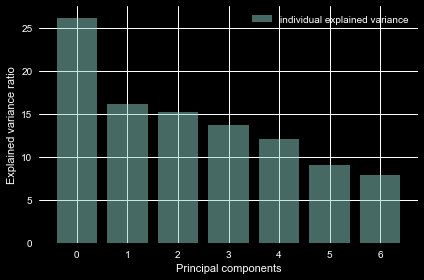

In [20]:
#With the help the help of a plot we show clearly the variance of each feature
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [21]:
##Construction of the projection matrix that will be used to transform the Human 
#resouces analytics data onto the new feature subspace.
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), #Take a sequence of arrays and stack 
                      eig_pairs[1][1].reshape(7,1)  #them horizontally to make a single array
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08797699  0.79752505]
 [ 0.50695734  0.33180877]
 [ 0.5788351  -0.10338032]
 [ 0.54901653  0.10388959]
 [ 0.31354922 -0.28404472]
 [-0.01930249  0.37489883]
 [ 0.00996933  0.10557298]]


In [22]:
#we use the 7×2-dimensional projection matrix W to transform our samples 
#onto the new subspace via the equation Y=X×W.
Y = X_std.dot(matrix_w)
Y

array([[-1.90035018, -1.12083103],
       [ 2.1358322 ,  0.2493369 ],
       [ 3.05891625, -1.68312693],
       ..., 
       [-2.0507165 , -1.182032  ],
       [ 2.91418496, -1.42752606],
       [-1.91543672, -1.17021407]])

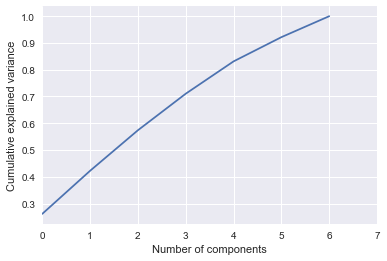

In [23]:
from sklearn.decomposition import PCA #module for Principal component analysis (PCA)
pca = PCA().fit(X_std) #apply the PCA on the features
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #Return the cumulative sum of the elements along a given axis.
plt.xlim(0,7,1) #Get or set the x limits of the current axes
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [24]:
sklearn_pca = PCA(n_components=6) #Create a two component PCA model, and project our data down 
#into this reduced dimensional space.
Y_sklearn = sklearn_pca.fit_transform(X_std) #transformation of the data onto unit scale

In [25]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ..., 
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [26]:
Y_sklearn.shape

(14999, 6)

In [27]:
###chi^2 test to the data to retrieve only the five best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
X_new.shape

(14999, 5)

In [28]:
###L1-based feature selection###
from sklearn.feature_selection import SelectFromModel #Meta-transformer for selecting features based on importance weights.
from sklearn.svm import LinearSVC #Linear Support Vector Classification

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y) #parameter C controls the sparsity: 
#the smaller C the fewer features selected
model = SelectFromModel(lsvc, prefit=True) #instantiate the Meta-Transformer  for selecting features based on importance weights.
X_new = model.transform(X) #Dataset transformations
X_new.shape

(14999, 7)

In [29]:
###Tree-based feature selection###

from sklearn.ensemble import ExtraTreesClassifier #meta estimator that fits a number of randomized decision trees 
#(a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy 
#and control over-fitting.

In [30]:
clf = ExtraTreesClassifier() #instantiate the meta estimator that fits a number of randomized decision 
#trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
clf = clf.fit(X, y)
clf.feature_importances_  

array([ 0.23424104,  0.14573302,  0.26921403,  0.14883372,  0.18166837,
        0.01706262,  0.0032472 ])

In [31]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(14999, 5)

Feature ranking:
1. feature 2 (0.242739)
2. feature 0 (0.241223)
3. feature 4 (0.180995)
4. feature 1 (0.167534)
5. feature 3 (0.150949)
6. feature 5 (0.013603)
7. feature 6 (0.002957)


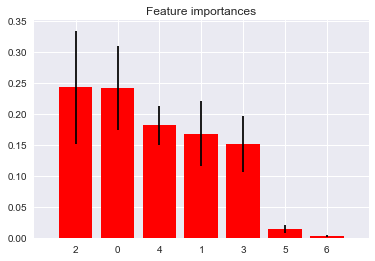

In [40]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=18,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression #import the model for Logistic regression
from sklearn.model_selection import train_test_split #module for splitting data in train and test set

In [42]:
#Perform feature selections using RFE - select top 5 features
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X,y)
print(fit.n_features_)
print(np.asarray(hr_data.columns.drop(['left', 'satisfaction_level'])))
print(rfe.ranking_)
print(rfe.support_)

5
['last_evaluation' 'number_project' 'average_montly_hours'
 'time_spend_company' 'Work_accident' 'promotion_last_5years' 'sales'
 'salary']
[1 1 1 3 2 1 1]
[ True  True  True False False  True  True]


In [43]:
#automatically select best number of features after cross-validation using RFECV
rfecv = RFECV(estimator=model, step=1, cv=10)
fit = rfecv.fit(X,y)
print(fit.n_features_)
print(np.asarray(hr_data.columns.drop(['left', 'satisfaction_level'])))
print(rfecv.ranking_)
print(rfecv.support_)

3
['last_evaluation' 'number_project' 'average_montly_hours'
 'time_spend_company' 'Work_accident' 'promotion_last_5years' 'sales'
 'salary']
[1 2 3 5 4 1 1]
[ True False False False False  True  True]


In [44]:
from sklearn.metrics import accuracy_score

#conduct logistic regression with all features
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

model = LogisticRegression()
logreg = model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print('accuracy score', accuracy_score(Y_test, predictions))



accuracy score 0.757


In [45]:
#conduct logistic regression with selected features
X2 = np.array(hr_data.drop(['last_evaluation', 'sales','salary'],1).astype(float))
X2_train, X2_test, Y_train, Y_test = train_test_split(X2,y, test_size=0.20, random_state=42)

model = LogisticRegression()
logreg = model.fit(X2_train, Y_train)
predictions = model.predict(X2_test)
print('accuracy score', accuracy_score(Y_test, predictions))

accuracy score 1.0
